In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import pearsonr

In [2]:
ds= pd.read_csv('D:\Datasets\Boston.csv', index_col=0)

In [3]:
print(type(ds))
print(ds)

<class 'pandas.core.frame.DataFrame'>
         crim    zn  indus  chas    nox     rm    age     dis  rad  tax  \
1     0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296   
2     0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242   
3     0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242   
4     0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222   
5     0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222   
6     0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222   
7     0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311   
8     0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311   
9     0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311   
10    0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311   
11    0.22489  12.5   7.87     0  0.524  6.377   94.3  6.3467    5  311   
12    0.11747  12.5   7.87     0  0.524  6.009   82.9  6.2267 

In [4]:
ds.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
print(ds.shape)

(506, 14)


In [6]:
print(ds.columns)
print(ds.ndim)

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')
2


In [7]:
ds.isnull().any()

crim       False
zn         False
indus      False
chas       False
nox        False
rm         False
age        False
dis        False
rad        False
tax        False
ptratio    False
black      False
lstat      False
medv       False
dtype: bool

# Correlation by program

In [8]:
corr= ds.corr()

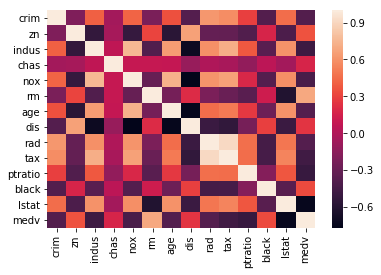

In [9]:
sb.heatmap(corr)

In [10]:
corr.shape[0]
#corr.iloc[0:15]
columns= np.full((corr.shape[0],),True,dtype= bool)
print(columns)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True]


In [11]:
columns= np.full((corr.shape[0],),True,dtype= bool)
for i in range(corr.shape[0]):
    for j in range(i+1,corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j]= False


In [96]:
selected_columns= ds.columns[columns]
data = ds[selected_columns]
#print(data)

In [13]:
selected_columns = selected_columns[1:].values
import statsmodels.formula.api as sm
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns
SL = 0.05
data_modeled, selected_columns = backwardElimination(data.iloc[:,1:].values, data.iloc[:,0].values, SL, selected_columns)

In [14]:
result = pd.DataFrame()
result['crim']= ds.iloc[:,0]
#print(result)

In [15]:
data = pd.DataFrame(data = data_modeled, columns = selected_columns)
print(data.columns)

Index(['zn', 'indus', 'rm', 'dis', 'rad', 'lstat', 'medv'], dtype='object')


In [16]:
#corr,p_value= pearsonr(ds.iloc[:,2],ds.iloc[:,4])         #INDUS and NOX correlation
#print(corr)
#print(p_value.round(8))
#corr,p_value= pearsonr(ds.iloc[:,4],ds.iloc[:,9])         #TAX and NOX correlation
#print(corr)
#print(p_value.round(8))
#corr,p_value= pearsonr(ds.iloc[:,2],ds.iloc[:,9])         #INDUS and TAX correlation
#print(corr)
#print(p_value.round(8))

# Correlation Matrix

In [17]:
#f = plt.figure(figsize=(19, 15))
#plt.matshow(ds.corr(), fignum=f.number)
#plt.xticks(range(ds.shape[1]), ds.columns, fontsize=14, rotation=45)
#plt.yticks(range(ds.shape[1]), ds.columns, fontsize=14)
#cb = plt.colorbar()
#cb.ax.tick_params(labelsize=14)
#plt.title('Correlation Matrix', fontsize=16);

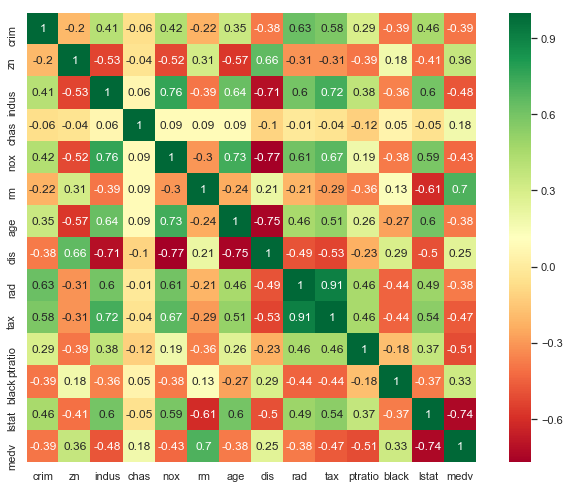

In [18]:
sb.set(rc={'figure.figsize':(11.7,8.27)})
sb.heatmap(ds.corr().round(2), square=True, cmap='RdYlGn', annot=True)

In [19]:
#rs = np.random.RandomState(0)
df = pd.DataFrame(ds)
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1,-0.200469,0.406583,-0.0558916,0.420972,-0.219247,0.352734,-0.37967,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1,-0.533828,-0.0426967,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.17552,-0.412995,0.360445
indus,0.406583,-0.533828,1,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.72076,0.383248,-0.356977,0.6038,-0.483725
chas,-0.0558916,-0.0426967,0.062938,1,0.0912028,0.0912512,0.0865178,-0.0991758,-0.00736824,-0.0355865,-0.121515,0.0487885,-0.0539293,0.17526
nox,0.420972,-0.516604,0.763651,0.0912028,1,-0.302188,0.73147,-0.76923,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.0912512,-0.302188,1,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.69536
age,0.352734,-0.569537,0.644779,0.0865178,0.73147,-0.240265,1,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.37967,0.664408,-0.708027,-0.0991758,-0.76923,0.205246,-0.747881,1,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.00736824,0.611441,-0.209847,0.456022,-0.494588,1,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.72076,-0.0355865,0.668023,-0.292048,0.506456,-0.534432,0.910228,1,0.460853,-0.441808,0.543993,-0.468536


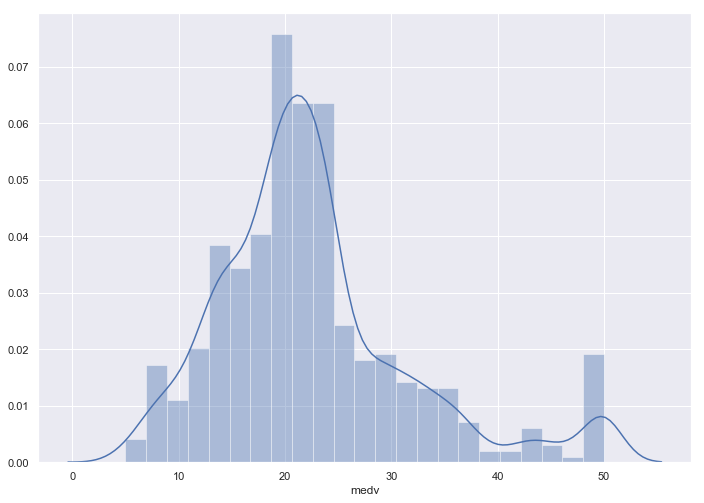

In [20]:
sb.distplot(ds['medv'])

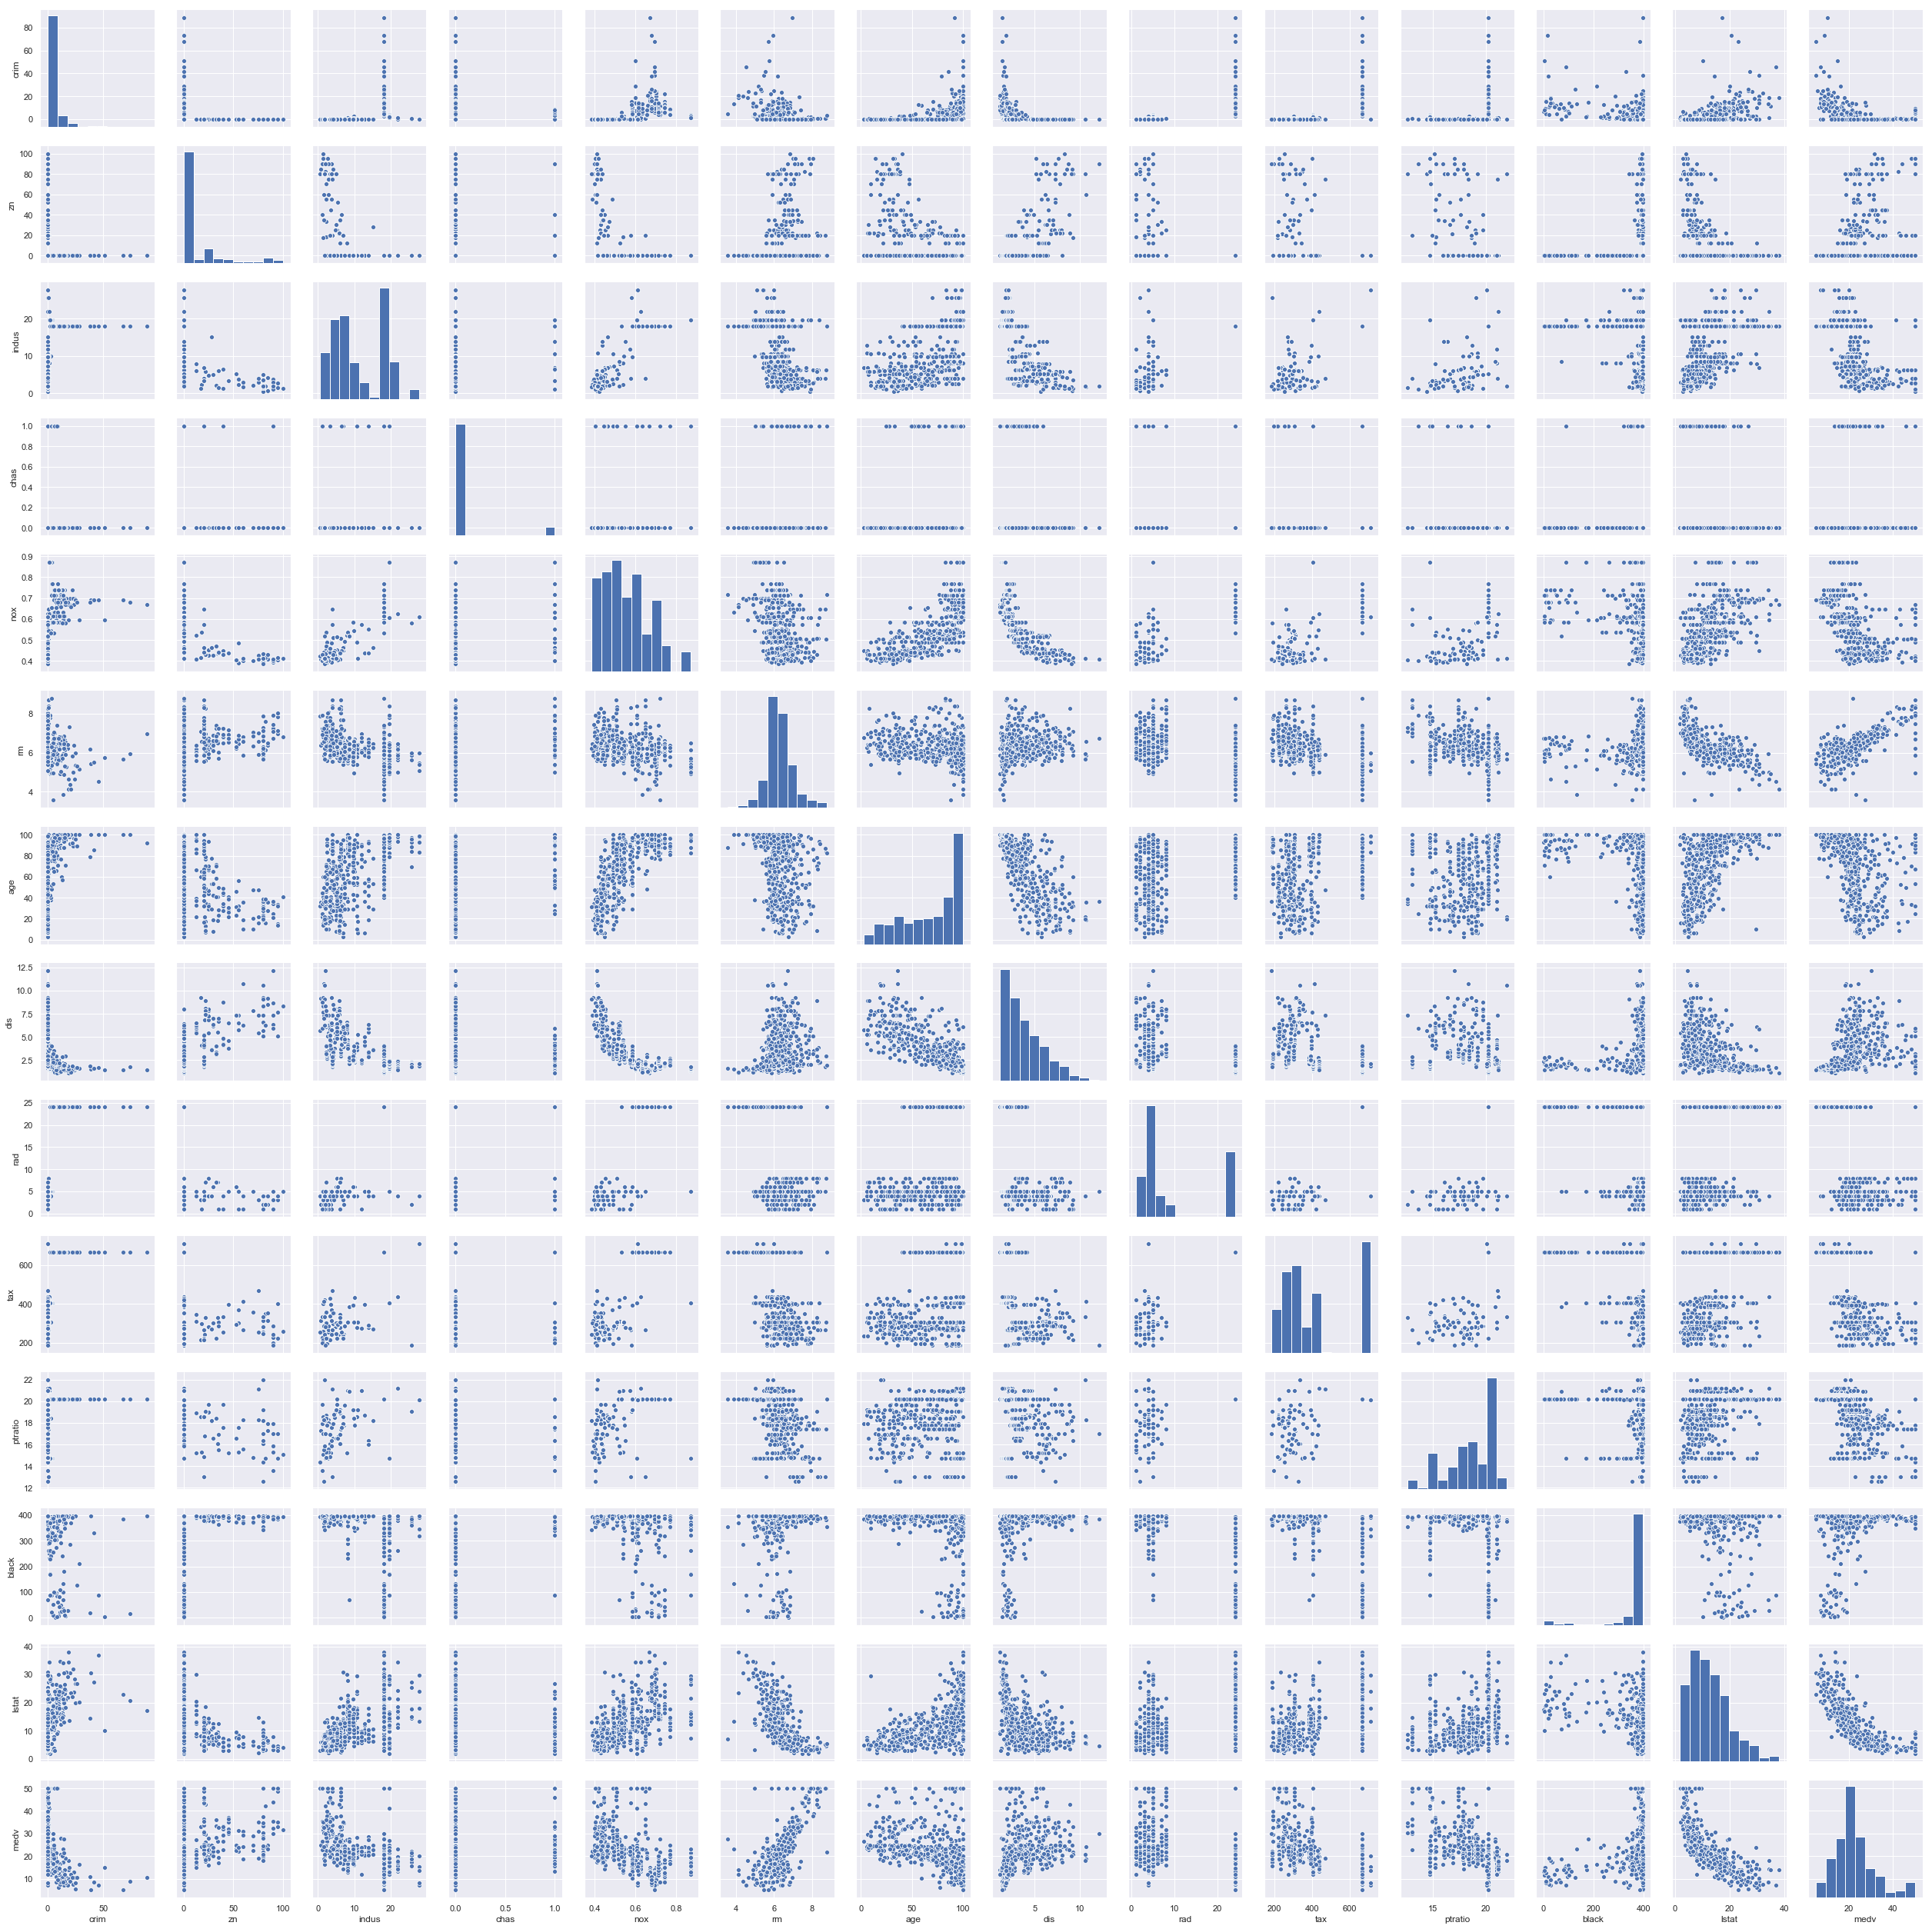

In [21]:
sb.pairplot(ds)

In [22]:
data.columns

Index(['zn', 'indus', 'rm', 'dis', 'rad', 'lstat', 'medv'], dtype='object')

In [23]:
x= data[['zn', 'indus', 'rm', 'dis', 'rad', 'lstat']]
y= data[['medv']]

# Linear Model 

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [26]:
regression= LinearRegression()
regression.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [36]:
print(regression.intercept_)
print(regression.coef_)
print(regression.get_params)

[4.85054675]
[[ 0.06275021 -0.14323743  5.21859091 -1.35319396 -0.10432671 -0.65174083]]
<bound method BaseEstimator.get_params of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)>


In [28]:
y_pred= regression.predict(x_test)
#y_pred

In [29]:
df= pd.DataFrame({'Actual':[y_test],'Predicted':[y_pred]})
df.head(25)

,Actual,Predicted
0,medv 307 28.2 178 29.9 227 31.6 133 1...,"[[32.40646936217419], [31.09332238984565], [32..."


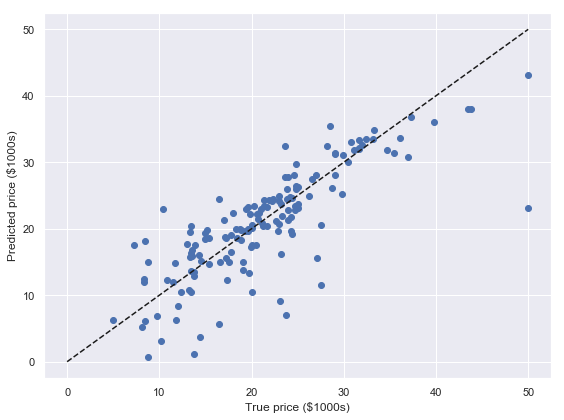

In [30]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.tight_layout()

# Error Metrics 

In [31]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Square Error:', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean square Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 3.4793838756925513
Mean Square Error: 25.93867145657501
Root Mean square Error: 5.0930022046505155


# Model for CRIM,CHAS,RM

In [87]:
x1= ds[['crim','chas','rm']]
y1= ds[['medv']]


In [81]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.3)

In [82]:
regression1= LinearRegression()
regression1.fit(x1_train,y1_train)
print(x1_train)

         crim  chas     rm
449   9.32909     0  6.185
254   0.36894     0  8.259
421  11.08740     0  6.411
409   7.40389     0  5.617
258   0.61154     0  8.704
256   0.03548     0  5.876
116   0.17134     0  5.928
458   8.20058     0  5.936
334   0.05083     0  6.316
37    0.09744     0  5.841
304   0.10000     0  6.982
235   0.44791     1  6.726
383   9.18702     0  5.536
12    0.11747     0  6.009
142   1.62864     0  5.019
172   2.31390     0  5.880
236   0.33045     0  6.086
463   6.65492     0  6.317
149   2.33099     0  5.186
183   0.09103     0  7.155
318   0.24522     0  5.782
84    0.03551     0  6.167
358   3.84970     1  6.395
293   0.03615     0  6.630
317   0.31827     0  5.914
200   0.03150     0  6.975
340   0.05497     0  5.985
367   3.69695     0  4.963
6     0.02985     0  6.430
218   0.07013     0  6.642
..        ...   ...    ...
489   0.15086     0  5.454
207   0.22969     0  6.326
411  51.13580     0  5.757
106   0.13262     0  5.851
85    0.05059     0  6.389
4

In [93]:
print(regression1.intercept_)
print(regression1.coef_)
qu = pd.DataFrame({'chas':[0],'crim':[0.1], 'RM': [6] })

[-29.4798616]
[[-0.30041104  4.3535668   8.45931966]]


# 6.1.c

In [86]:
y_pred1= regression1.predict(x1_test)
qu1= regression1.predict(qu)
print(qu1)

[[21.71141302]]


In [88]:
df1= pd.DataFrame({'Actual':[y1_test],'Predicted':[y_pred1]})
df1.head(25)

,Actual,Predicted
0,medv 47 20.0 427 10.2 447 14.9 131 1...,"[[19.409176512076755], [16.217993154784466], [..."


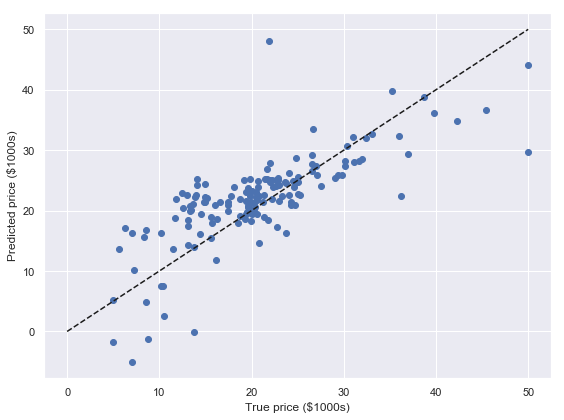

In [89]:
plt.figure(figsize=(8, 6))
plt.scatter(y1_test, y_pred1)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.tight_layout()

# 6.d.iii

In [90]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y1_test,y_pred1))
print('Mean Square Error:', metrics.mean_squared_error(y1_test,y_pred1))
print('Root Mean square Error:', np.sqrt(metrics.mean_squared_error(y1_test,y_pred1)))

Mean Absolute Error: 4.068151362969895
Mean Square Error: 31.422035307815367
Root Mean square Error: 5.605536130274728


In [91]:
import statsmodels.api as sm
X = sm.add_constant(x1)
model = sm.OLS(y1, x1).fit()
predictions = model.predict(x1) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     1933.
Date:                Thu, 19 Sep 2019   Prob (F-statistic):          1.33e-275
Time:                        23:08:28   Log-Likelihood:                -1693.5
No. Observations:                 506   AIC:                             3393.
Df Residuals:                     503   BIC:                             3406.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
crim          -0.3562      0.035    -10.080      0.0

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


# Summary

6.1 
a. Why should the data be partitioned into training and validation sets? What will the training set be used for? What will the validation set be used for?

The Training Set is used to train or build a model. 
Once a model is built using the Training Set, the performance of the model must be validated using new data. 
The Validation Set is often used to fine-tune models. 

b. Fit a multiple linear regression model to the median house price (MEDV) as a function of CRIM, CHAS, and RM. 
Write the equation for predicting the median house price from the predictors in the model.
ans   
MEDV = -29.4798616 -0.3562 * crim + 4.3597 * chas+ 3.7947 * rm

c. Using the estimated regression model, what median house price is predicted for a tract in the Boston area that does not bound the Charles River, has a crime rate of 0.1, and where the average number of rooms per house is 6? What is the prediction error?
ans:

qu = pd.DataFrame({'chas':[0],'crim':[0.1], 'RM': [6] })
print(qu1)
>>>[21.71141302]

d. i. Which predictors are likely to be measuring the same thing among the 13 predictors? Discuss the relationships among        INDUS, NOX, and TAX.
ans
    From Correlation Matrix it is evident that crim, chas, nox, age, tax, ptratio, black
    INDUS, NOX, and TAX has highest correlations.
    
    
   ii. Compute the correlation table for the 12 numerical predictors and search for highly correlated pairs. These have potential redundancy and can cause multi- collinearity. Choose which ones to remove based on this table.
ans    

To fit a linear regression model, we select those features which have a high correlation with our target variable MEDV. By looking at the correlation matrix we can see that RM has a strong positive correlation with MEDV (0.7) where as LSTAT has a high negative correlation with MEDV(-0.74).The features RAD, TAX have a correlation of 0.91. These feature pairs are strongly correlated to each other. We should not select both these features together for training the model. 
Same goes for the features DIS and AGE which have a correlation of -0.75.
   
   
   iii. Use stepwise regression with the three options (backward, forward, both) to reduce the remaining predictors as follows: Run stepwise on the training set. Choose the top model from each stepwise run. Then use each of these models separately to predict the validation set. Compare RMSE, MAPE, and mean error, as well as lift charts. Finally, describe the best model.
    
Mean Absolute Error: 4.068151362969895
Mean Square Error: 31.422035307815367
Root Mean square Error: 5.605536130274728
R-squared:0.920